# About the Green Building Masterplan at Singapore

Pada 2005, Building Construction Authority (BCA) Singapore meluncurkan skema yang menjadi landasan Green Building Masterplan yang mendorong para stakeholder di industri untuk mengadopsi konsep green building. Masterplan Green Building yang pertama kali diluncurkan pada 2006 juga telah mengalami beberapa kali pembaruan sejak pertama kali diluncurkan. Pada mulanya ditargetkan untuk bangunan baru, untuk mendiring para pengembang menerapkan konsep berkelanjutan pada keseluruhan life-cyclenya sejak awal. Seiringan dengan industri yang mulai mengedepankan aspek keberlanjutan pada bangunan, BCA memperlebar targetnya mencakup bangunan-bangunan eksisting dan mengajak para penghuni bangunan untuk mengubah perilaku konsumsi energinya menjadi lebih hemat. Targetnya adalah minimal 80% bangunan (dihitung dari luas lantainya) di Singapore telah termasuk green building pada 2030.

Source : [Green Building Masterplans](https://www1.bca.gov.sg/buildsg/sustainability/green-building-masterplans)

# Main Point

Untuk melihat pekembangan terkini dari status green building pada bangunan-bangunan di Singapura

# Import library and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
#Import and check data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/listing-of-building-energy-performance-data-for-commercial-buildings.csv'

In [ ]:
df = pd.read_csv(PATH)
df.head()

,buildingname,buildingaddress,buildingtype,greenmarkstatus,greenmarkrating,greenmarkyearaward,buildingsize,grossfloorarea,2017energyuseintensity,2018energyusintensity,voluntarydisclosure
0,HEXACUBE,"160 CHANGI ROAD, SINGAPORE 419728",Mixed Development,No,NaN,NaN,Small,"5,036",81.0,105.0,Y
1,NaN,NaN,Retail,No,NaN,NaN,Small,NaN,475.0,402.0,N
2,CITY SQUARE MALL,"180 KITCHENER ROAD, SINGAPORE 208539",Retail,Yes,Platinum,2018.0,Large,"65,640",382.0,365.0,Y
3,REPUBLIC PLAZA,"9 RAFFLES PLACE, SINGAPORE 048619",Office,Yes,Platinum,2018.0,Large,"102,356",212.0,183.0,Y
4,CENTRAL MALL,"1 MAGAZINE ROAD, SINGAPORE 059567",Office,Yes,Platinum,2017.0,Large,"15,769",203.0,181.0,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   buildingname            783 non-null    object 
 1   buildingaddress         986 non-null    object 
 2   buildingtype            1244 non-null   object 
 3   greenmarkstatus         1244 non-null   object 
 4   greenmarkrating         306 non-null    object 
 5   greenmarkyearaward      306 non-null    float64
 6   buildingsize            1189 non-null   object 
 7   grossfloorarea          986 non-null    object 
 8   2017energyuseintensity  1224 non-null   float64
 9   2018energyusintensity   1224 non-null   float64
 10  voluntarydisclosure     1244 non-null   object 
dtypes: float64(3), object(8)
memory usage: 107.0+ KB


data pada kolom grossfloorarea bertipe object, kita perlu mengubahnya menjadi tipe data numerik seperti float.

# Data Cleaning

Mengecek data null dan melakukan pembersihan yang diperlukan

In [ ]:
df.isnull().sum()

buildingname              461
buildingaddress           258
buildingtype                0
greenmarkstatus             0
greenmarkrating           938
greenmarkyearaward        938
buildingsize               55
grossfloorarea            258
2017energyuseintensity     20
2018energyusintensity      20
voluntarydisclosure         0
dtype: int64

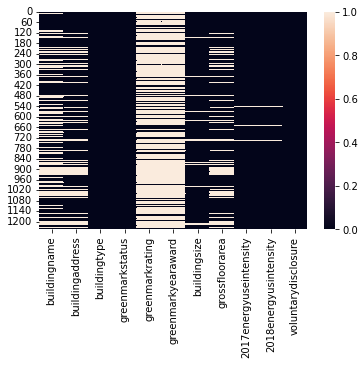

In [ ]:
sns.heatmap(df.isnull())

I think building address, energy use on 2017 and 2018 are curcial.
So we will drop row that have null values on those columns.

In [ ]:
df = df.dropna(subset = ['buildingaddress','2017energyuseintensity','2018energyusintensity']).reset_index(drop=True)

Also, we don't building's name, building size (Large or Small) and Voluntary Disclosure.

In [ ]:
df = df.drop(['buildingname','buildingsize','voluntarydisclosure'], axis=1).reset_index(drop=True)

In [ ]:
df.isnull().sum()

buildingaddress             0
buildingtype                0
greenmarkstatus             0
greenmarkrating           676
greenmarkyearaward        676
grossfloorarea              0
2017energyuseintensity      0
2018energyusintensity       0
dtype: int64

In [ ]:
#Check greenmarkrating and greenmarkyearaward.
df[['greenmarkrating','greenmarkyearaward']]

,greenmarkrating,greenmarkyearaward
0,NaN,NaN
1,Platinum,2018.0
2,Platinum,2018.0
3,Platinum,2017.0
4,Gold,2015.0
...,...,...
972,NaN,NaN
973,NaN,NaN
974,Platinum,2010.0
975,Platinum,2016.0


So every greenmarkrating's value is null, greenmarkyearaward also null.
We can leave them now.
Next, we are going to extract address to get postal code.

In [ ]:
#Change grossfloorarea type
df['grossfloorarea'] = df['grossfloorarea'].str.replace(',','').astype(int)

Actually a little typo on columns name and value in building type ('Univerisity')

In [ ]:
df['buildingtype'].unique()

array(['Mixed Development', 'Retail', 'Office', 'Hotel',
       'Community Hospital', 'Private Clinic', 'Polytechnic',
       'General Hospital/ Specialist Centre (Public)', 'Nursing Home',
       'Private School', 'Univerisity', 'Specialist Centre (Public)',
       'TCM Clinic', 'ITE', 'Private Hospital (Private)',
       'Private College', 'Polyclinic'], dtype=object)

In [ ]:
df['buildingtype'] = df['buildingtype'].apply(lambda x : 'University' if x == 'Univerisity' else x)

In [ ]:
df = df.rename(columns={'2018energyusintensity':'2018energyuseintensity'})
df

,buildingaddress,buildingtype,greenmarkstatus,greenmarkrating,greenmarkyearaward,grossfloorarea,2017energyuseintensity,2018energyuseintensity,postalcode
0,"160 CHANGI ROAD, SINGAPORE 419728",Mixed Development,No,NaN,NaN,5036,81.0,105.0,419728
1,"180 KITCHENER ROAD, SINGAPORE 208539",Retail,Yes,Platinum,2018.0,65640,382.0,365.0,208539
2,"9 RAFFLES PLACE, SINGAPORE 048619",Office,Yes,Platinum,2018.0,102356,212.0,183.0,048619
3,"1 MAGAZINE ROAD, SINGAPORE 059567",Office,Yes,Platinum,2017.0,15769,203.0,181.0,059567
4,"11 TANJONG KATONG ROAD, SINGAPORE 437157",Retail,Yes,Gold,2015.0,28938,431.0,396.0,437157
...,...,...,...,...,...,...,...,...,...
972,"63 MARKET STREET, SINGAPORE 048942",Office,No,NaN,NaN,18275,456.0,458.0,048942
973,"260 TANJONG PAGAR ROAD, SINGAPORE 088542",Office,No,NaN,NaN,4024,155.0,160.0,088542
974,"1 SELEGIE ROAD, SINGAPORE 188306",Private School,Yes,Platinum,2010.0,21832,288.0,261.0,188306
975,"80 MARINE PARADE ROAD, SINGAPORE 449269",Office,Yes,Platinum,2016.0,99012,326.0,330.0,449269


In [ ]:
df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

# Conclusion
30.8% buildings at Singapore are green building.
Less than half of quantity of each building type are green building.
There is significant reduction amount of green building added from 2017 to 2018.
In average usage from 2017.
Not Certified building has decreased by 2.7
Platinum building has increased by 9.4
Gold builidng has decreased by 10.8